In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
#%matplotlib notebook
from scipy.cluster.vq import vq, kmeans, whiten
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score
from mpl_toolkits.mplot3d import Axes3D

In [2]:
with open('d:/texts/Vocabular physics.txt', 'r') as f:
    voc_ph = [word  for line in f for word in line.split() if len(word)>3]
    voc_ph = set(voc_ph)
    print(len(voc_ph))
with open('d:/texts/Vocabular chemistry.txt', 'r') as f:
    voc_ch = [word for line in f for word in line.split() if len(word)>3]
    voc_ch = set(voc_ch)
    print(len(voc_ch))
with open('d:/texts/Vocabular psychology.txt', 'r') as f:
    voc_bi = [word for line in f for word in line.split() if len(word)>3]
    voc_bi = set(voc_bi)
    print(len(voc_bi))

for i in voc_ch:
    if i in voc_bi:
        print(i)

283
159
347


In [3]:
df = pd.DataFrame(columns=['Name', 'Ch', 'Ps', 'Ph'])
name = ['ch', 'ps', 'ph']
number = [0 , 1, 2]
path = 'd:/Texts/'
for n, nn in zip(name, number):
    for i in range(7):
        full_path = path+n+str(i)+'.txt'
        p=b=c = 0
        with open(full_path, 'r') as f:
            for line in f:
                for word in line.split():
                    if word in voc_ph:
                        p+=1
                    if word in voc_ch:
                        c+=1
                    if word in voc_bi:
                        b+=1
        df = df.append({'Name': nn, 'Ch':c, 'Ps':b, 'Ph':p}, ignore_index=True)
df

,Name,Ch,Ps,Ph
0,0,34,4,3
1,0,44,5,6
2,0,48,9,3
3,0,93,14,6
4,0,49,23,10
5,0,90,31,6
6,0,63,20,4
7,1,15,174,15
8,1,16,107,10
9,1,20,121,9


In [4]:
target = df.Name
df = df.drop(['Name'], axis=1)
train = df.sample(frac=0.7, replace=True, random_state=17)

In [5]:
whitened_train = whiten(train.astype(float))
whitened = whiten(df.values.astype(float))
book = np.array((whitened_train[1],whitened_train[7],whitened_train[12]))
centroid, distortion = kmeans(whitened_train, book)
code, dist = vq(whitened,centroid)

centroid2, distortion = kmeans(whitened_train, 3)
code2, dist2 = vq(whitened,centroid)

km = KMeans(n_clusters=3, random_state=0).fit(train)
code3 = km.predict(df.values)
centroid3 = km.cluster_centers_ 

print("Clastering accuracy:")
print(code, (adjusted_mutual_info_score(code, target.values) * 100).astype(int), '% -- for k-means with specified centroids')
print(code2, (adjusted_mutual_info_score(code2, target.values) * 100).astype(int),'% -- for k-means with only amount of clusters')
print(code3, (adjusted_mutual_info_score(code3, target.values) * 100).astype(int),'% -- for k-means with only amount of clusters from sklearn')
print(target.values,'-- correct answer')

Clastering accuracy:
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 2 2 2] 100 % -- for k-means with specified centroids
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 2 2 2] 100 % -- for k-means with only amount of clusters
[2 2 2 2 2 2 2 1 1 1 1 1 1 1 0 0 0 0 0 0 0] 100 % -- for k-means with only amount of clusters from sklearn
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 2 2 2] -- correct answer


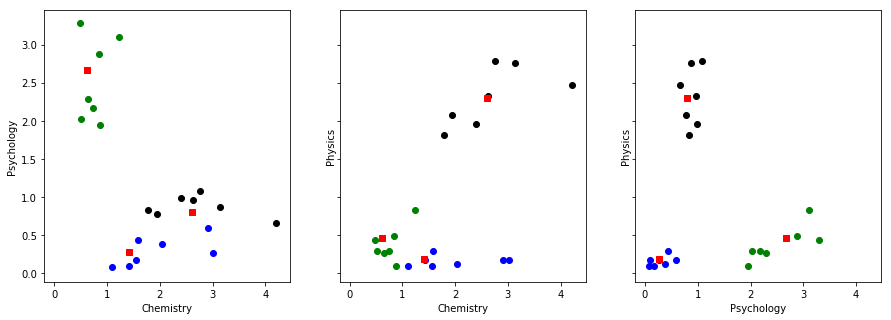

In [6]:
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15,5), sharex = True, sharey = True)
ax0.scatter(whitened[0:7, 0], whitened[0:7, 1], c='b')
ax0.scatter(whitened[7:14, 0], whitened[7:14, 1], c='g')
ax0.scatter(whitened[14:21, 0], whitened[14:21, 1], c='black')
ax0.scatter(centroid[:, 0], centroid[:, 1], c='r', marker = 's')
ax0.set_xlabel('Chemistry')
ax0.set_ylabel('Psychology')

ax1.scatter(whitened[0:7, 0], whitened[0:7, 2],  c='b')
ax1.scatter( whitened[7:14, 0],whitened[7:14, 2], c='g')
ax1.scatter( whitened[14:21, 0],whitened[14:21, 2], c='black')
ax1.scatter(centroid[:, 0],centroid[:, 2],  c='r', marker = 's')
ax1.set_xlabel('Chemistry')
ax1.set_ylabel('Physics')

ax2.scatter(whitened[0:7, 1], whitened[0:7, 2], c='b')
ax2.scatter( whitened[7:14, 1], whitened[7:14, 2], c='g')
ax2.scatter( whitened[14:21, 1], whitened[14:21, 2], c='black')
ax2.scatter(centroid[:, 1], centroid[:, 2], c='r', marker = 's')
ax2.set_xlabel('Psychology')
ax2.set_ylabel('Physics')


plt.show()

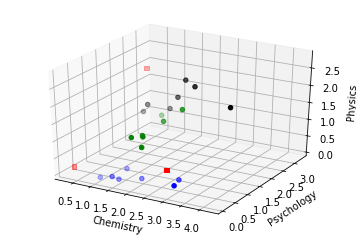

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(whitened[0:7, 0], whitened[0:7, 1], whitened[0:7, 2], c='blue')
ax.scatter(whitened[7:14, 0], whitened[7:14, 1], whitened[7:14, 2], c='green')
ax.scatter(whitened[14:21, 0], whitened[14:21, 1], whitened[14:21, 2], c='black')
ax.scatter(centroid[:, 1], centroid[:, 2], centroid[:, 2], c='red', marker = 's')

ax.set_xlabel('Chemistry')
ax.set_ylabel('Psychology')
ax.set_zlabel('Physics')
plt.show()